# What is this project about?

I recently started a Coursera course on Python Visualizations. I wanted to test my skills out. I really liked the visualizations that Spotify had created to summarize our listening history. Inspired by that, I decided to brush up on my Matplotlib and Seaborn skills. I hope you find this useful.

I based these visualizations off a [dataset](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db/data) I found on Kaggle. It was available as a CSV file.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
import seaborn as sb
import numpy as np

In [4]:
tracks = pd.read_csv('data/SpotifyFeatures.csv')

In [3]:
print(tracks['genre'].value_counts())

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64


Here, it has to be noted that there's two records of Children's Music available, so we keep the larger one since it's inclusive of all the records. 

In [37]:
tracks = tracks[tracks['genre']!="Children's Music"]

# What are the most popular genres from the dataset?

First, we get a list of all unique genres of the songs.

In [38]:
genres = tracks['genre'].unique()

Then we iterate through the genres, find the count of songs belong to each genre, and them store in a dictionary.Then we calculate the average popularity of songs in each decade using the numpy ```mean``` function and store it into a dictionary

In [39]:
pops = {}
for genre in genres:
    pops[genre] = np.mean(tracks[tracks['genre']==genre]['popularity'])

This dictionary is converted into dataframe and plotted as a horizontal bar graph.

In [40]:
avg_pop = pd.DataFrame(data = pops.values(),index=pops.keys(),columns=['Average Popularity'])


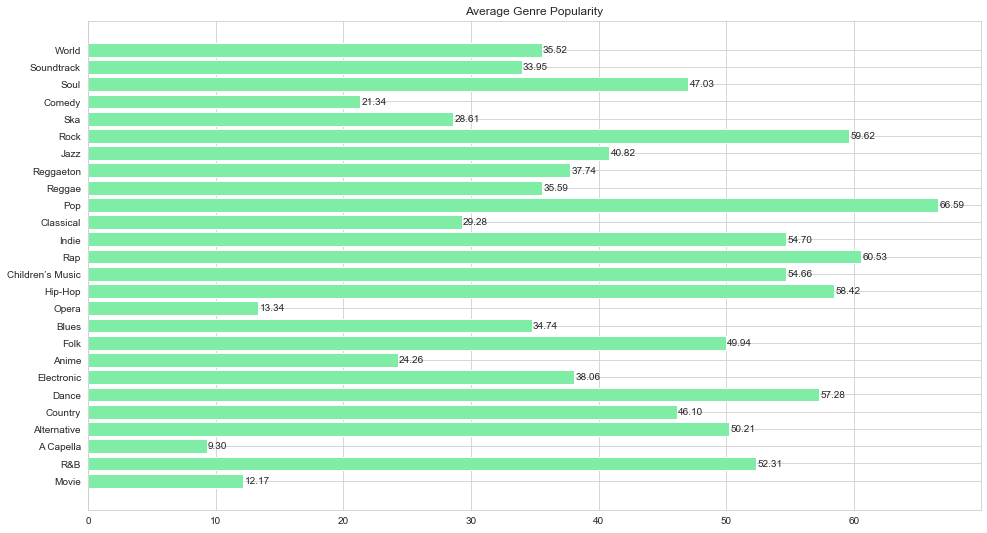

In [41]:
fig = plt.figure(figsize = (16,9))
ax = plt.axes()
plt.barh(y=avg_pop.index,width=avg_pop['Average Popularity'], color='#80eda7')
plt.title('Average Genre Popularity')
for a in pops:
    plt.text(pops[a]+0.1,a,str('%.2f'%(pops[a])),va='center')
fig.savefig('a.png',dpi=300)

Hasan Minhaj once said in his episode about hiphop on [Patriot Act](https://youtu.be/MEZV6EE8JMA?t=296) that shorter tracks are streamed a lot more. I wanted to test this statement. So we'll use the popularity measure and compare it to the track length. The track length is in milliseconds, however,and hence are converted to minutes by dividing by 1000 and then by 60.

In [42]:
tracks.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [43]:
tracks['duration_ms'] = tracks['duration_ms'].divide(1000*60)
tracks.rename(columns={'duration_ms':'duration_min'},inplace=True)

In [44]:
popdur = tracks[['popularity','duration_min']]
# popdur['duration_ms'] = popdur['duration_ms'].div(1000*60)

In [45]:
hists,bin_edges = np.histogram(popdur['duration_min'],10)

Let's see how the track length is distributed.

Text(0.5, 0, 'Track Duration (minutes)')

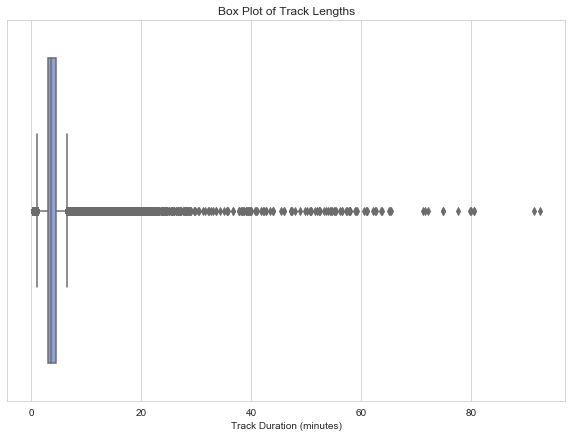

In [46]:
fig2 = plt.figure(figsize=(10,7))
ax = plt.axes()
bxplt = sb.boxplot(popdur['duration_min'],color='#819be6')
plt.title('Box Plot of Track Lengths')
plt.xlabel('Track Duration (minutes)')

There are multiple outliers, which skews the plot a lot. We will hide these outliers and plot them again. Since this plot was generated using Seaborn, we set the ```showfliers``` to ```False```.

Text(0.5, 0, 'Track Duration (minutes)')

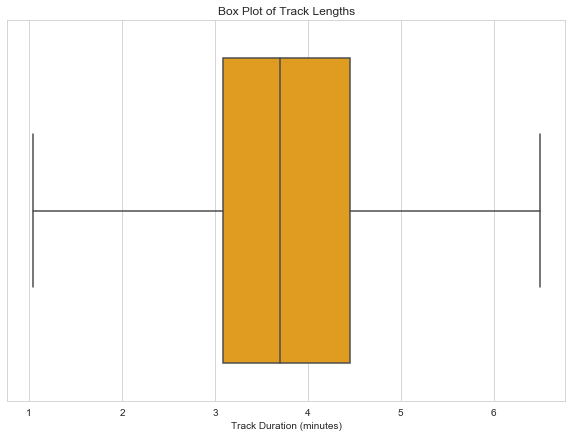

In [47]:
sb.set_style('whitegrid')
fig2 = plt.figure(figsize=(10,7))
ax = plt.axes()
bxplt = sb.boxplot(popdur['duration_min'], showfliers=False, color='orange')
plt.title('Box Plot of Track Lengths')
plt.xlabel('Track Duration (minutes)')

It is necessary to drop the outliers to prevent long tails from showing up in the plot, and thus stretching it. We will calculate the Z-Scores for the song durations, drop songs with Z-Scores more than 2 positive standard deviations away from the mean.

In [48]:
from scipy import stats

In [49]:
popdur = popdur.assign(z_score=stats.zscore(popdur['duration_min']))

The cell above was used to calculate Z-Scores, the cell below used to drop those tracks.

In [50]:
popdur = popdur[popdur['z_score']<2]

Now, let's make a scatter plot of the duration vs. popularity.

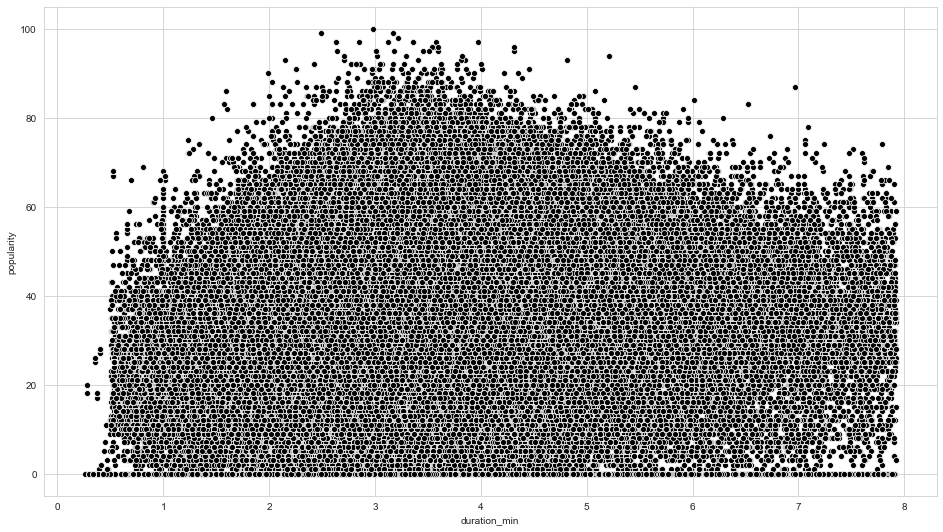

In [51]:
fig2 = plt.figure(2,figsize=(16,9))
sctr = sb.scatterplot(x=popdur['duration_min'],y=popdur['popularity'],color='black')

Well this data is too messy and crowded to make sense of. We need to find a better way to understand it. Interestingly though, we do notice a trend here; that songs closer to 3 minutes are often the most popular. <br>

We will use the previously-used box plots again. We noticed that the songs close to 3 minutes seem to be most popular, so we will classify songs into 4 categories, `Short`,for songs lower than 2 min. `Med`, for songs between 2 and 4 minutes, `Longish`, for songs between 4 to 6 minutes, and `Long` for songs longer than 6 minutes. This category variable column is added to the `popdur` dataframe.

In [52]:
length_cat = []
for i in popdur['duration_min']:
    if i <=2:
        length_cat.append('Short')
    elif i<=4:
        length_cat.append('Med')
    elif i<=6:
        length_cat.append('Longish')
    else:
        length_cat.append('Long')

In [53]:
popdur = popdur.assign(length_category = length_cat) 
popdur

,popularity,duration_min,z_score,length_category
0,0,1.656217,-1.160210,Short
1,1,2.289550,-0.840605,Med
2,3,2.837783,-0.563946,Med
3,0,2.540450,-0.713992,Med
4,4,1.377083,-1.301072,Short
...,...,...,...,...
232720,39,5.437333,0.747888,Longish
232721,38,4.707450,0.379561,Longish
232722,47,2.782667,-0.591760,Med
232723,44,3.707367,-0.125120,Med


Text(0, 0.5, 'Popularity')

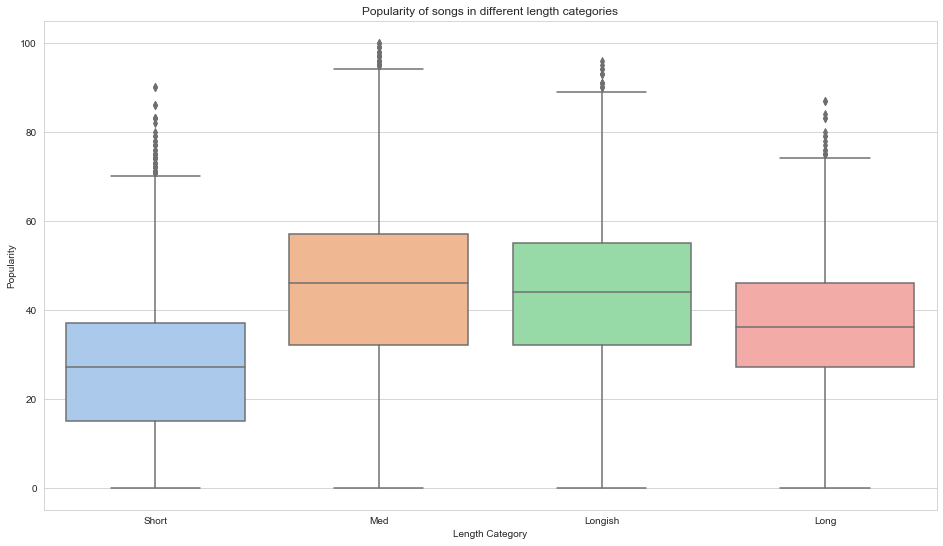

In [54]:
fig = plt.figure(figsize=(16,9))
bxplt = sb.boxplot(y=popdur['popularity'],x=popdur['length_category'],palette=sb.color_palette('pastel'))
plt.title('Popularity of songs in different length categories')
plt.xlabel('Length Category')
plt.ylabel('Popularity')

Having tried out the waffle chart to unsatisfactory results, I looked at a much simpler way of visualizing the most popular genre in different song length categories. We add the z-score column to the original `tracks` dataframe so that we can drop the outliers. Then we add another column for the song's `length_category` to the dataframe.

In [55]:
tracks = tracks.assign(z_score = stats.zscore(tracks['duration_min']))
tracks = tracks[tracks['z_score']<2]
tracks = tracks.assign(length_category = length_cat)

We create separate dataframes for each of the length categories.

In [56]:
short = tracks[tracks['length_category']=='Short']
medium = tracks[tracks['length_category']=='Med']
longish = tracks[tracks['length_category']=='Longish']
long = tracks[tracks['length_category']=='Long']

The `plot_hor_bars` function takes a dataframe, the column based on which the chart is plotted, and a color palette. Because I like colors. We create a dictionary with the genre being used as a key, and the count of that genre the corresponding value. This dictionary is converted to a dataframe, then sorted in descending order for better visibility and then plotted using Seaborn.

In [57]:
def plot_hor_bars(data,column,palettes):
    pops = dict()
    for key in data[column].unique():
        pops[key] = np.mean(data[data[column]==key]['popularity'])
    pops = pd.DataFrame(pops.values(),index=list(pops.keys()))
    pops.columns = ['Average Popularity']
    pops.sort_values(by=['Average Popularity'],inplace=True,ascending=False)
    pl1 = plt.figure(figsize=(16,9))
    sb.barplot(y=pops.index.values,
               x=pops['Average Popularity'],
               palette=sb.color_palette(palettes,
                                        n_colors=len(pops.index.values)))

## Short Songs

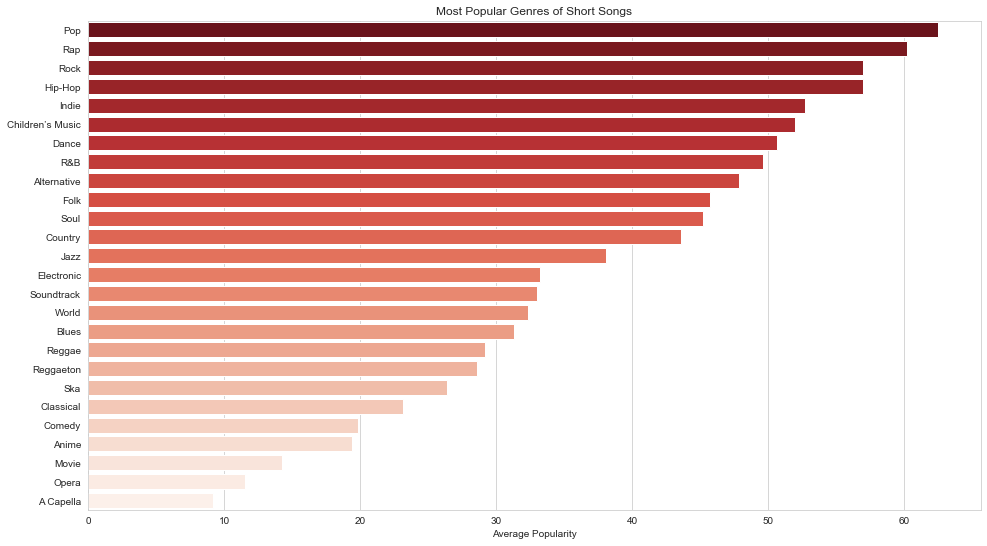

In [58]:
plot_hor_bars(short,'genre','Reds_r')
title = plt.title('Most Popular Genres of Short Songs')

## Medium Songs

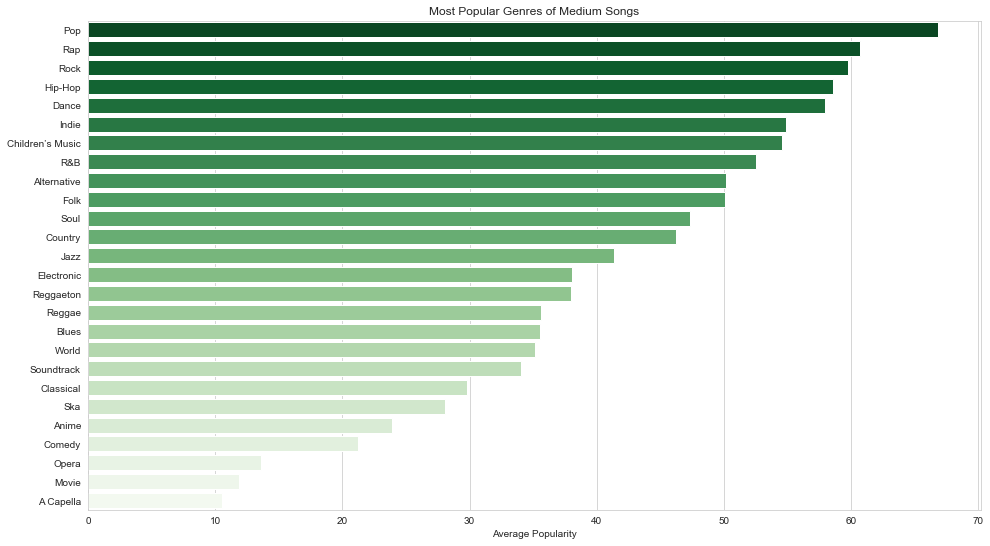

In [59]:
plot_hor_bars(medium,'genre','Greens_r')
title = plt.title('Most Popular Genres of Medium Songs')

## Longish Songs

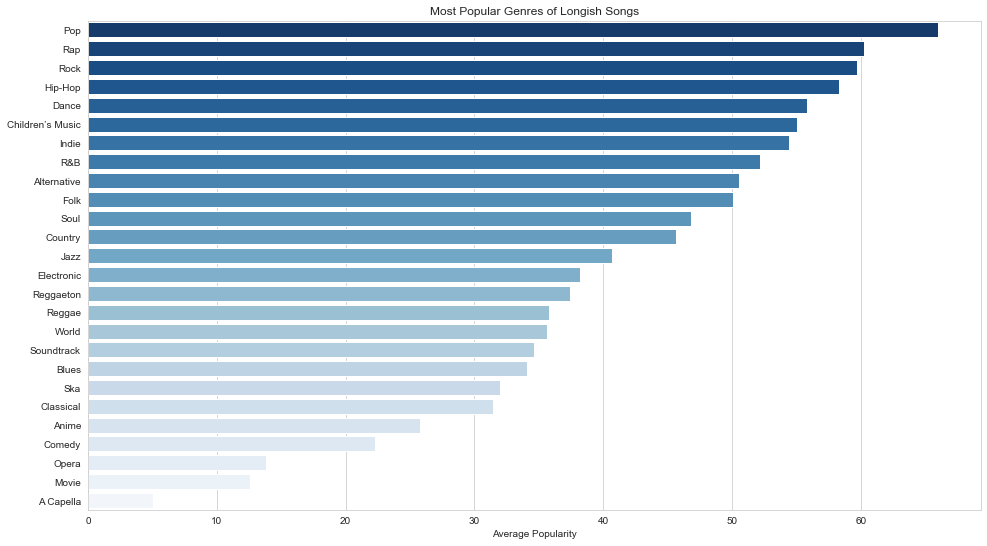

In [60]:
plot_hor_bars(longish,'genre','Blues_r')
title = plt.title('Most Popular Genres of Longish Songs')

## Long Songs

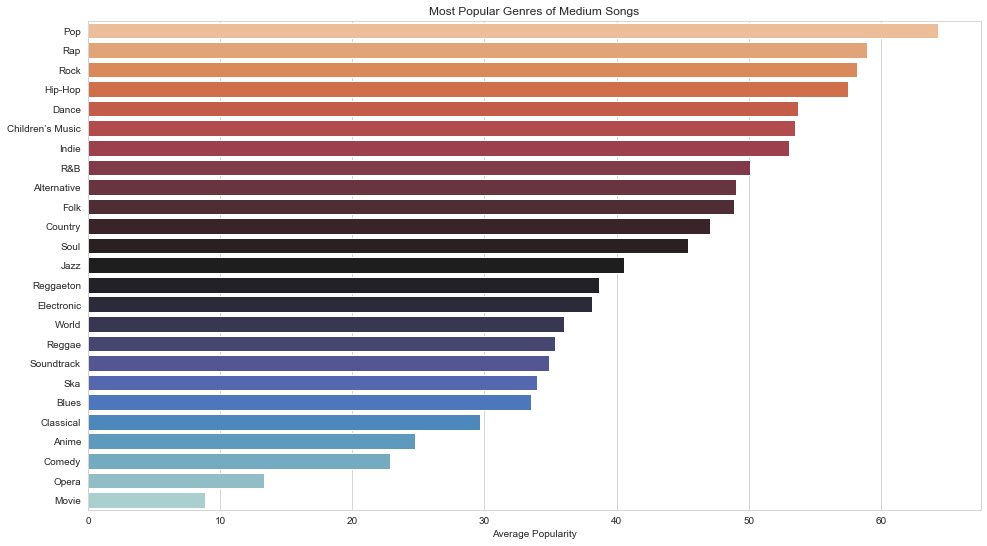

In [61]:
plot_hor_bars(long,'genre','icefire_r')
title = plt.title('Most Popular Genres of Medium Songs')

## Conclusion

Pop music is popular, pop music is mainstream. It gets played the for a variety of song lengths. Acapella songs are often the least-played songs. <br>
The difference between pop and rap music is the least for short songs. That does not necessarily mean Hasan Minhaj was wrong. The lines between genres have blurred significantly in 